In [2]:
# import library
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt

import pymoo
from pymoo.model.problem import Problem

import pandas as pd


import joblib

import seaborn as sns

In [41]:
## amorphous와 ferrite의 비교

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

read_data1 = pd.read_csv("../result/result_0613_F111_N100_amorphous.csv")
read_data2 = pd.read_csv("../result/result_0613_F111_N300_amorphous.csv")
read_data3 = pd.read_csv("../result/result_0613_F111_N1000_amorphous.csv")
read_data4 = pd.read_csv("../result/result_0613_F111_N3000_amorphous.csv")
read_data5 = pd.read_csv("../result/result_0613_F111_N10000_amorphous.csv")
read_data6 = pd.read_csv("../result/result_0613_F111_N30000_amorphous.csv")

read_data1.head()

,Unnamed: 0,N1,w1,l1,l2,h1,per,space1,space2,space3,space4,coil_width1,coil_width2,move_z1,move_z2,offset_z1,offset_z2,V,B,Lmt,Llt,w,l,h,total_loss,copperloss_tx,copperloss_rx,copperloss,coreloss
0,21,8.0,50.0,24.0,86.0,50.0,3500.0,23.0,23.0,13.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1644.4890,0.286258,963.271325,32.250363,99.0,169.5,98.0,238.213119,113.596897,80.922943,194.519839,43.693280
1,92,8.0,50.0,24.0,87.0,50.0,3500.0,23.0,23.0,13.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1654.1910,0.286258,953.017205,32.469346,99.0,170.5,98.0,237.718871,113.645050,80.380542,194.025592,43.693280
2,6,8.0,50.0,23.0,95.0,59.0,3500.0,23.0,23.0,13.0,9.0,3.0,4.0,2.0,2.0,0.0,0.0,1834.7175,0.298704,882.969568,32.286090,99.0,176.5,105.0,221.970303,102.350869,69.768190,172.119059,49.851245
3,98,8.0,50.0,25.0,86.0,50.0,3500.0,23.0,23.0,16.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1697.8500,0.274808,1021.082616,32.995110,99.0,171.5,100.0,237.053691,114.017028,81.060286,195.077314,41.976377
4,15,8.0,51.0,23.0,86.0,50.0,3500.0,23.0,23.0,13.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1608.0000,0.292847,1042.029037,31.984487,100.0,167.5,96.0,239.793406,114.605883,80.922943,195.528826,44.264580


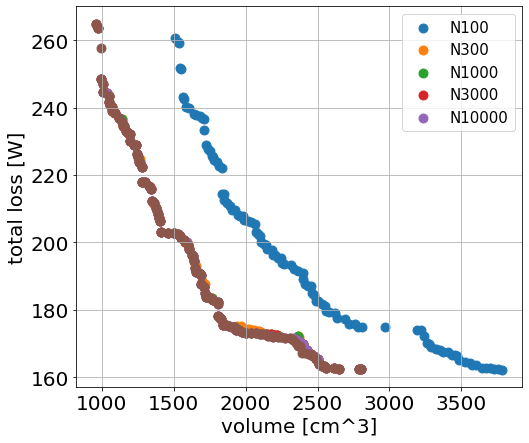

In [42]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["total_loss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["total_loss"] ,s=80)
plt.scatter(read_data3["V"], read_data3["total_loss"] ,s=80)
plt.scatter(read_data4["V"], read_data4["total_loss"] ,s=80)
plt.scatter(read_data5["V"], read_data5["total_loss"] ,s=80)
plt.scatter(read_data6["V"], read_data6["total_loss"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("total loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["N100","N300","N1000","N3000","N10000"], fontsize=15)

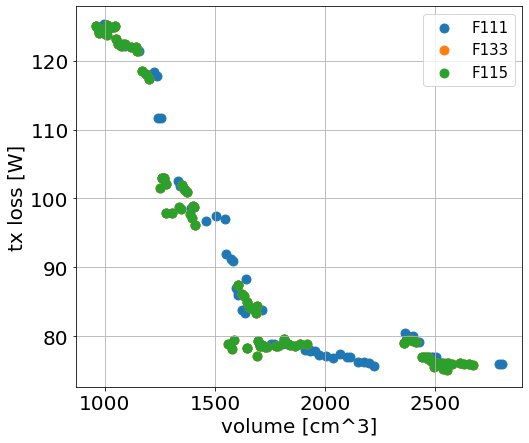

In [30]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["copperloss_tx"] ,s=80)
plt.scatter(read_data2["V"], read_data2["copperloss_tx"] ,s=80)
plt.scatter(read_data3["V"], read_data3["copperloss_tx"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("tx loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["F111","F133","F115"], fontsize=15)

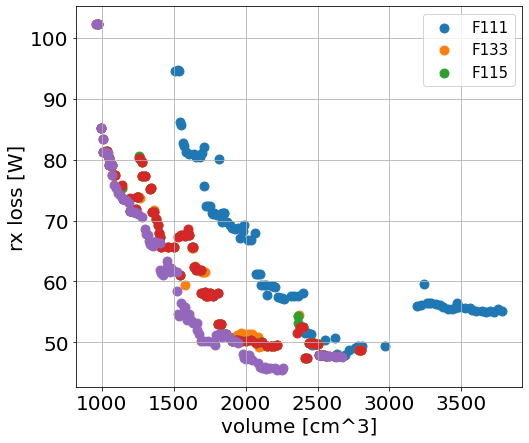

In [38]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["copperloss_rx"] ,s=80)
plt.scatter(read_data2["V"], read_data2["copperloss_rx"] ,s=80)
plt.scatter(read_data3["V"], read_data3["copperloss_rx"] ,s=80)
plt.scatter(read_data4["V"], read_data4["copperloss_rx"] ,s=80)
plt.scatter(read_data5["V"], read_data5["copperloss_rx"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("rx loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["F111","F133","F115"], fontsize=15)

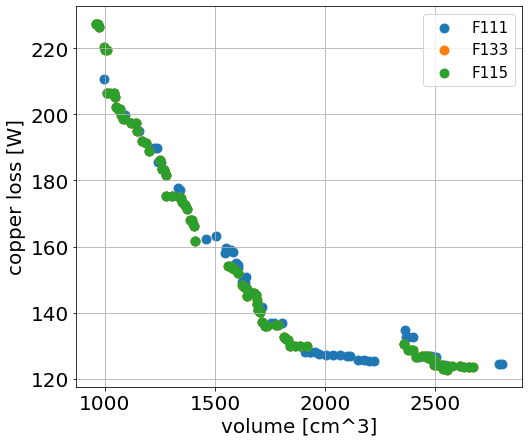

In [32]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["copperloss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["copperloss"] ,s=80)
plt.scatter(read_data3["V"], read_data3["copperloss"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("copper loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["F111","F133","F115"], fontsize=15)

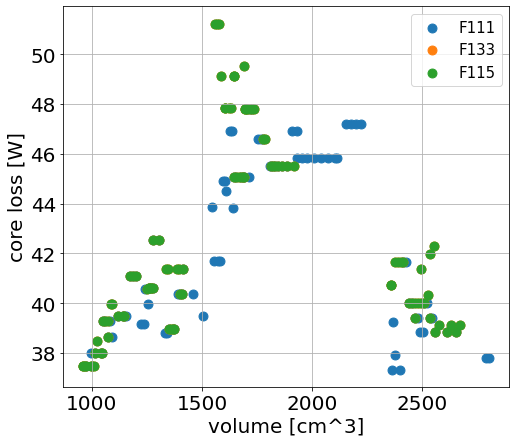

In [33]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["coreloss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["coreloss"] ,s=80)
plt.scatter(read_data3["V"], read_data3["coreloss"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("core loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["F111","F133","F115"], fontsize=15)